# Visualización con matplotlib#

## ¿Qué es matplotlib?

* Estándar *de facto* para visualización en Python
* Matplotlib es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python y su extensión matemática NumPy
* Pretende ser similar a las funciones de visualización de MATLAB
* Diferentes formas de usarla: interfaz `pyplot` y orientada a objetos

Lo primero que vamos a hacer es activar el modo *inline* - de esta manera las figuras aparecerán automáticamente incrustadas en el notebook.

In [1]:
%matplotlib inline

Importamos los paquetes necesarios:

In [2]:
import numpy as np
import matplotlib.pyplot as plt


La biblioteca matplotlib es gigantesca y es difícil hacerse una idea global de todas sus posibilidades en una primera toma de contacto. Es recomendable tener a mano la documentación y la galería:

In [3]:
from IPython.display import HTML
HTML('<iframe src="http://matplotlib.org/gallery.html#pylab_examples" width="800" height="600"></iframe>')

Si hacemos clic en cualquiera de las imágenes, accedemos al código fuente que la ha generado:

In [4]:
HTML('<iframe src="http://matplotlib.org/examples/pylab_examples/annotation_demo.html" width="800" height="600"></iframe>')

## Interfaz pyplot

### Función `plot`

La interfaz `pyplot` proporciona una serie de funciones que operan sobre un *estado global* - es decir, nosotros no especificamos sobre qué gráfica o ejes estamos actuando. Es una forma rápida y cómoda de crear gráficas pero perdemos parte del control.

El paquete `pyplot` se suele importar bajo el alias `plt`, de modo que todas las funciones se acceden a través de `plt.<funcion>`. La función más básica es la función `plot`:

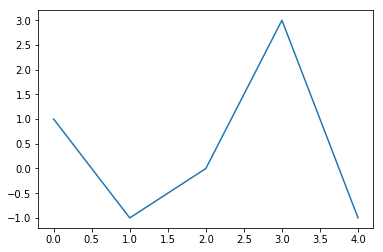

In [5]:
plt.plot([1, -1, 0, 3, -1])

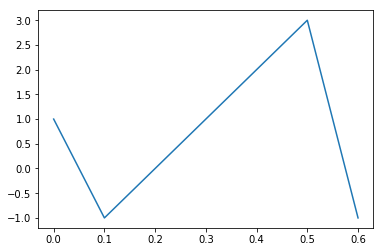

In [7]:
plt.plot([0, 0.1, 0.2, 0.5,0.6], [1, -1, 0, 3, -1])

La función `plot` recibe una sola lista (si queremos especificar los valores *y*) o dos listas (si especificamos *x* e *y*). Naturalmente si especificamos dos listas ambas tienen que tener la misma longitud.

La tarea más habitual a la hora de trabajar con matplotlib es representar una función. Lo que tendremos que hacer es definir un dominio y evaluarla en dicho dominio. Por ejemplo:

$$f(x) = e^{-x^2}$$

In [19]:
def f(x):
    return np.exp(-x ** 2)

Definimos el dominio con la función `np.linspace`, que crea un vector de puntos equiespaciados:

In [9]:
x = np.linspace(-1, 5, num=30)

Y representamos la función:

Text(0.5,1,'Función $f(x)$')

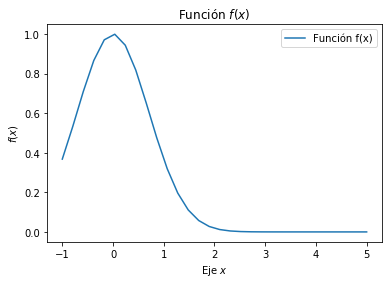

In [10]:
plt.plot(x, f(x), label="Función f(x)")
plt.xlabel("Eje $x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.title("Función $f(x)$")

Notamos varias cosas:

* Con diversas llamadas a funciones dentro de `plt.` se actualiza el gráfico *actual*. Esa es la forma de trabajar con la interfaz pyplot.
* Podemos añadir etiquetas, y escribir $\LaTeX$ en ellas. Tan solo hay que encerrarlo entre signos de dólar $$.

### Personalización

La función `plot` acepta una serie de argumentos para personalizar el aspecto de la función. Con una letra podemos especificar el color, y con un símbolo el tipo de línea.

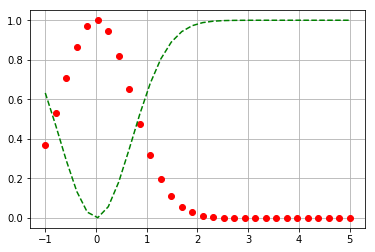

In [79]:
plt.plot(x, f(x), 'ro')
plt.plot(x, 1 - f(x), 'g--')
plt.grid(True)

Esto en realidad son códigos abreviados, que se corresponden con argumentos de la función `plot`:

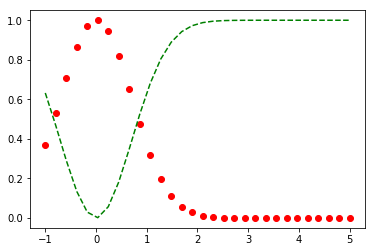

In [80]:
plt.plot(x, f(x), color='red', linestyle='', marker='o')
plt.plot(x, 1 - f(x), c='g', ls='--')

La lista de posibles argumentos y abreviaturas está disponible en la documentación de la función `plot` http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot.

### Otro tipo de gráficas

La función `scatter` muestra una nube de puntos, con posibilidad de variar también el tamaño y el color.

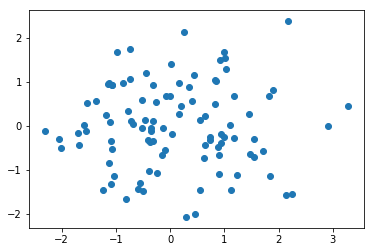

In [11]:
N = 100
x = np.random.randn(N)
y = np.random.randn(N)

plt.scatter(x, y)

Con `s` y `c` podemos modificar el tamaño y el color respectivamente. Para el color, a cada valor numérico se le asigna un color a través de un *mapa de colores*; ese mapa se puede cambiar con el argumento `cmap`. Esa correspondencia se puede visualizar llamando a la función `colorbar`.

C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


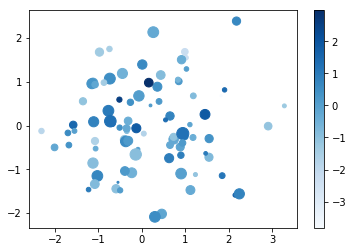

In [12]:
s = 50 + 50 * np.random.randn(N)
c = np.random.randn(N)

plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Blues)
plt.colorbar()

C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


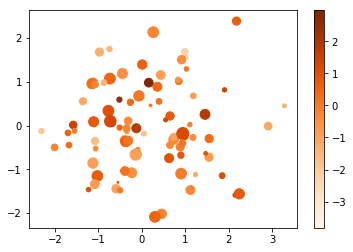

In [14]:
plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Oranges)
plt.colorbar()

matplotlib trae por defecto muchos mapas de colores. En las SciPy Lecture Notes dan una lista de todos ellos:

![matplotlib colormaps](plot_colormaps.png)

La función `contour` se utiliza para visualizar las curvas de nivel de funciones de dos variables y está muy ligada a la función `np.meshgrid`. Veamos un ejemplo:

$$f(x) = \cos{x} + \sin^2{y}$$

In [15]:
def f(x, y):
    return np.cos(x) + np.sin(y) ** 2

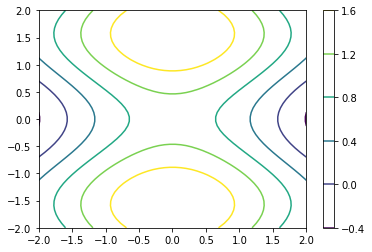

In [16]:
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)
xx, yy = np.meshgrid(x, y)

plt.contour(xx, yy, f(xx, yy))
plt.colorbar()

La función `contourf` es casi idéntica pero rellena el espacio entre niveles. Podemos especificar manualmente estos niveles usando el cuarto argumento:

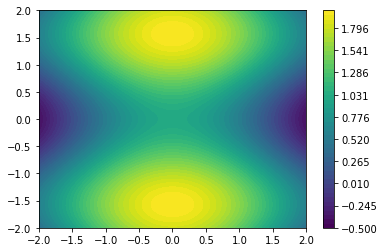

In [17]:
zz = f(xx, yy)
plt.contourf(xx, yy, zz, np.linspace(-0.5, 2.0))
plt.colorbar()

Para guardar las gráficas en archivos aparte podemos usar la función `plt.savefig`. matplotlib usará el tipo de archivo adecuado según la extensión que especifiquemos. Veremos esto con más detalle cuando hablemos de la interfaz orientada a objetos.

## Interfaz orientada a objetos

In [20]:
x

array([-2.        , -1.91836735, -1.83673469, -1.75510204, -1.67346939,
       -1.59183673, -1.51020408, -1.42857143, -1.34693878, -1.26530612,
       -1.18367347, -1.10204082, -1.02040816, -0.93877551, -0.85714286,
       -0.7755102 , -0.69387755, -0.6122449 , -0.53061224, -0.44897959,
       -0.36734694, -0.28571429, -0.20408163, -0.12244898, -0.04081633,
        0.04081633,  0.12244898,  0.20408163,  0.28571429,  0.36734694,
        0.44897959,  0.53061224,  0.6122449 ,  0.69387755,  0.7755102 ,
        0.85714286,  0.93877551,  1.02040816,  1.10204082,  1.18367347,
        1.26530612,  1.34693878,  1.42857143,  1.51020408,  1.59183673,
        1.67346939,  1.75510204,  1.83673469,  1.91836735,  2.        ])

In [21]:
f(x)

array([0.01831564, 0.02521961, 0.03426625, 0.04594165, 0.06077968,
       0.07934545, 0.10221096, 0.12992261, 0.16296105, 0.20169481,
       0.24633007, 0.2968602 , 0.3530192 , 0.41424427, 0.47965227,
       0.54803503, 0.61787689, 0.68739663, 0.75461367, 0.81743599,
       0.87376504, 0.92161045, 0.9592061 , 0.98511809, 0.99833541,
       0.99833541, 0.98511809, 0.9592061 , 0.92161045, 0.87376504,
       0.81743599, 0.75461367, 0.68739663, 0.61787689, 0.54803503,
       0.47965227, 0.41424427, 0.3530192 , 0.2968602 , 0.24633007,
       0.20169481, 0.16296105, 0.12992261, 0.10221096, 0.07934545,
       0.06077968, 0.04594165, 0.03426625, 0.02521961, 0.01831564])

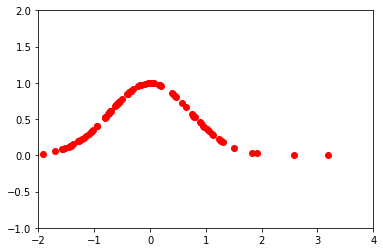

In [97]:
fig, axes = plt.subplots()
axes.plot(x, f(x), 'ro', label="Función F(x)")
axes.set_xlim(-2, 4)
axes.set_ylim(-1, 2)

fig.savefig("grafica1.png")

Text(0.5,0,'Eje x de la gráfica derecha')

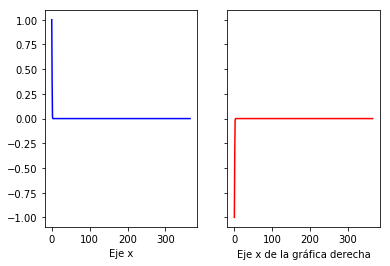

In [34]:
fig, axes = plt.subplots(1, 2, sharey=True)

axes[0].plot(x, f(x), color="blue")
axes[0].set_xlabel("Eje x")

axes[1].plot(x, -f(x), 'r')
axes[1].set_xlabel("Eje x de la gráfica derecha")

C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


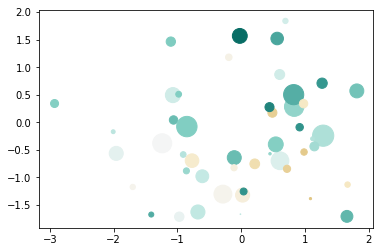

In [23]:
x = np.random.randn(100)
y = np.random.randn(100)

s = 200 * np.random.randn(100)
c = np.random.randn(100)

plt.scatter(x, y, s, c, cmap=plt.cm.BrBG_r)

$$g(x, y) = \cos(x) + \sin(y)^2$$

In [24]:
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)

xx, yy = np.meshgrid(x, y)

In [25]:
def g(x, y):
    return np.cos(x) + np.sin(y) ** 2

In [26]:
zz = g(xx, yy)

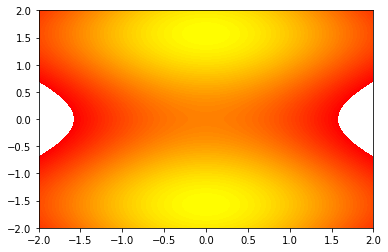

In [35]:
fig, axes = plt.subplots()

axes.contourf(xx, yy, zz, np.linspace(0, 2), cmap=plt.cm.autumn)

* `fig, axes = plt.subplots`
* Diferencias de conceptos

## Ejemplo con datos reales

In [28]:
!type temperaturas.csv

STATION,DATE,TMAX,TMIN
GHCND:USW00094728,20130101,44,-33
GHCND:USW00094728,20130102,6,-56
GHCND:USW00094728,20130103,0,-44
GHCND:USW00094728,20130104,28,-11
GHCND:USW00094728,20130105,56,0
GHCND:USW00094728,20130106,78,11
GHCND:USW00094728,20130107,72,28
GHCND:USW00094728,20130108,89,17
GHCND:USW00094728,20130109,94,39
GHCND:USW00094728,20130110,83,44
GHCND:USW00094728,20130111,78,28
GHCND:USW00094728,20130112,83,56
GHCND:USW00094728,20130113,100,61
GHCND:USW00094728,20130114,133,33
GHCND:USW00094728,20130115,33,17
GHCND:USW00094728,20130116,28,0
GHCND:USW00094728,20130117,61,17
GHCND:USW00094728,20130118,17,-39
GHCND:USW00094728,20130119,106,-11
GHCND:USW00094728,20130120,117,-11
GHCND:USW00094728,20130121,0,-33
GHCND:USW00094728,20130122,-28,-106
GHCND:USW00094728,20130123,-67,-117
GHCND:USW00094728,20130124,-56,-111
GHCND:USW00094728,20130125,-44,-106
GHCND:USW00094728,20130126,-28,-94
GHCND:USW00094728,20130127,11,-72
GHCND:USW00094728,20130128,22,-17
GHCND:USW00094728,20130129,94,

In [31]:
datos = np.loadtxt("temperaturas.csv", usecols=(1, 2, 3), skiprows=1, delimiter=',')

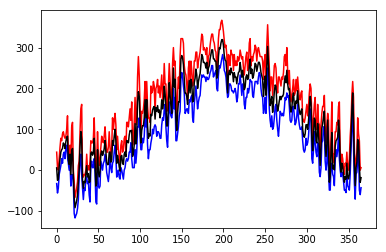

In [32]:
fig, axes = plt.subplots()

x = np.arange(len(datos[:, 1]))

temp_media = (datos[:, 1] + datos[:, 2]) / 2

axes.plot(x, datos[:, 1], 'r')
axes.plot(x, datos[:, 2], 'b')
axes.plot(x, temp_media, 'k')

## Referencias

* Documentación pyplot http://matplotlib.org/api/pyplot_api.html
* Tutorial de matplotlib en español http://pybonacci.wordpress.com/tag/tutorial-matplotlib-pyplot/
* Referencia rápida de matplotlib http://scipy-lectures.github.io/intro/matplotlib/matplotlib.html#quick-references